In [ ]:
import numpy as np
import pandas as pd

# 读取数据集
data = pd.read_csv(r'iris.csv', header=0)
# 删除不需要的列（特征）
data.drop(['Id', 'Species'], axis=1, inplace=True)
# 删除重复的记录
data.drop_duplicates(inplace=True)

In [21]:
# 使用KNN实现回归预测
# 根据鸢尾花前3个特征的值，寻找最近的k个邻居
# 然后对k个最近邻居的第4个特征属性求均值，预测当前样本的第4个特征值
class KNN:
    # 初始化方法
    # 参数k: 近邻个数
    def __init__(self, k):
       self.k = k
    
    # 训练方法
    # 参数X: 类数组（特征矩阵），形状为[样本数量, 特征数量]，待训练的样本特征（属性）
    # 参数y: 类数组（目标标签），形状为[样本数量]，每个样本的目标值（标签）
    def fit(self, X, y):
        self.X = np.asarray(X)
        self.y = np.asarray(y)
        
    # 测试方法
    # 参数X：类数组（特征矩阵），形状为[样本数量, 特征数量]，待测试的样本特征（属性）
    # 返回预测结果值，数组类型
    def predict(self, X):
        # 转换为数组类型
        X = np.asarray(X)
        # 保存预测的结果值
        result = []
        
        for x in X:
            # 计算距离（计算与训练集中每个X的距离，数组间的对位运算）
            dis = np.sqrt(np.sum((x - self.X) ** 2, axis=1))
            # 返回数组排序后，每个元素在原数组中的索引
            index = dis.argsort()
            # 取前k个距离最近的索引
            index = index[:self.k]
            # 计算均值，加入到返回的结果中
            result.append(np.mean(self.y[index]))
            
            # 增加权重
            # 求所有邻居节点距离的倒数之和
            # 分母加上一个很小值，避免除数为0
            # s = np.sum(1 / (dis[index] + 0.001)）
            # 计算权重，用当前节点的距离的倒数之和除以所有近邻节点的距离的倒数之和
            # weight = (1 / (dis[index] + 0.001)) / s
            # 使用邻居节点的标签值，乘以对应的权重，得到预测值
            # result.append(np.sum(self.y[index] * weight))

        return np.asarray(result)

In [22]:
# 对数据进行打乱
t = data.sample(len(data), random_state=0)
#构建训练集和测试集
train_X = t.iloc[:120, :-1]
train_y = t.iloc[:120, -1]
test_X = t.iloc[120:, :-1]
test_y = t.iloc[120:, -1]

# 进行训练及测试
knn = KNN(3)
knn.fit(train_X, train_y)
result = knn.predict(test_X)
# 打印预测值
display(result)
# 打印真实值
display(test_y.values)
# 求预测值与真实值的误差均值
np.mean(np.sum((result - test_y) ** 2))

array([1.33333333, 2.        , 1.2       , 1.26666667, 1.93333333,
       1.16666667, 2.16666667, 0.36666667, 1.9       , 1.4       ,
       1.2       , 0.16666667, 1.93333333, 2.26666667, 1.73333333,
       0.13333333, 1.03333333, 1.3       , 1.83333333, 1.23333333,
       0.16666667, 0.23333333, 0.16666667, 2.03333333, 1.2       ,
       1.8       , 0.2       ])

array([1.5, 1.8, 1. , 1.3, 2.1, 1.2, 2.2, 0.2, 2.3, 1.3, 1. , 0.2, 1.6,
       2.1, 2.3, 0.3, 1. , 1.2, 1.5, 1.3, 0.2, 0.4, 0.1, 2.1, 1.1, 1.5,
       0.2])

1.1299999999999997

In [23]:
# 预测结果的可视化
import matplotlib as mpl
import matplotlib.pyplot as plt

# 中文支持
mpl.rcParams['font.family'] = 'SimHei'
mpl.rcParams['axes.unicode_minus'] = False

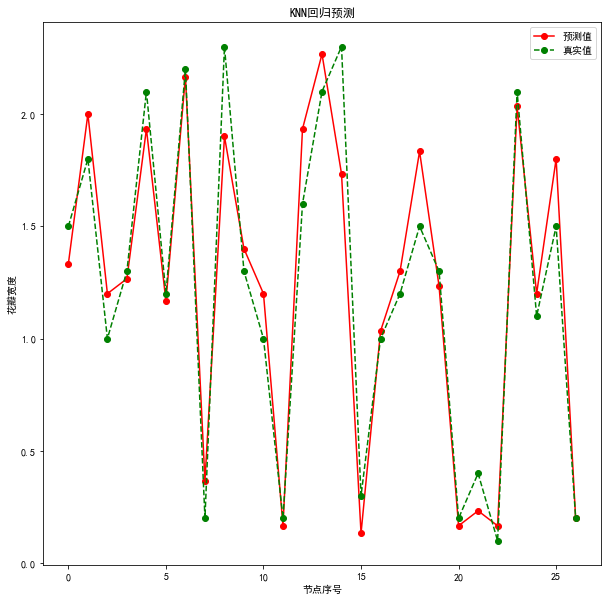

In [24]:
# 设置画布大小
plt.figure(figsize=(10, 10))
# 绘制预测值
plt.plot(result, 'ro-', label='预测值')
# 绘制真实值
plt.plot(test_y.values, 'go--', label='真实值')
# 画布设置
plt.title('KNN回归预测')
plt.xlabel('节点序号')
plt.ylabel('花瓣宽度')
plt.legend()
plt.show()